# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

def append_list_strings_dict(list_1,list_2):
    return_list = []
    for i in range(len(list_1)):
        return_list.append(list_1[i]+" ("+str(list_2[i])+")")
    return return_list

# Seaborn Relplot

In [ ]:
import seaborn as sns

#df = pd.read_csv("results/classification_250_estimators_output_df.csv")
#df = pd.read_csv("results/estimators_50_Classification_output_df.csv")
#df = pd.read_csv("results/logisticregressioncv_output_df.csv")
#df = pd.read_csv("results/chisquared_output_df.csv")
#df = pd.read_csv("results/f_classif_output_df.csv")
#df = pd.read_csv("results/randomforest_output_df.csv")
df = pd.read_csv("results/250_est_Catboost_borutashap_output_df.csv")

df["%informative_features"]=np.tile(np.repeat([10,33,50,90],5),15)
df["%found_informative_features"]=df["found_informative_features"]/df["informative_features"]*100
#df["%outputted_noise_features"]=df["outputted_noise_features"]/(df["found_informative_features"]+df["outputted_noise_features"])*100
df["%outputted_noise_features"]=df["outputted_noise_features"]/(df["total_features"]-df["informative_features"])*100

sns.set_context("talk")
row_order = ["time","%found_informative_features", "outputted_noise_features","%outputted_noise_features"]
row_names = ["duration (s)","% found informative features", "# noise features","% noise features"]
#df["n_samples"] = df["n_samples"].map(lambda x: f"{x:,}")
g = sns.relplot(
    data=df.melt(
        id_vars=["total_features", "informative_features", "n_samples", "%informative_features"]
    ),
    kind="line",
    hue="n_samples",
    hue_order=[1000,5000,20000],
    x="%informative_features",
    y="value",
    col="total_features",
    row="variable",
    palette="Set2",
    row_order=row_order,
    facet_kws={"sharey": False,"sharex":False},
    height=5,
)
g.set_titles("{col_var}={col_name}")

axis_all = g.axes
for axs in axis_all[0]:
    axs.set_yscale("log")
    axs.set_ylim([1,800])
for axs in axis_all[1]:  
    axs.set_ylim([-5,110])
for axs in axis_all[2]:
    axs.set_ylim([-0.25,5])
for axs in axis_all[3]:
    axs.set_ylim([-5,110])

order_samples = [1000,5000,20000]
order_features = [20,50,100,250,500]
j_plot=0
for row_axs, row_name in zip(g.axes, row_names):
    row_axs[0].set_ylabel(row_name)
    
    for rows in row_axs:
        rows.grid()
        rows.set_xlabel("")
        rows.set_xticks(ticks=[10,33,50,90])
        rows.set_xticklabels(append_list_strings_dict(["10%\n","33%\n","50%\n","90%\n"],df[(df.n_samples==1000)&(df.total_features==order_features[j_plot])&(df.seed==j_plot)].informative_features.values)) 
        j_plot = j_plot + 1
    j_plot = 0
    
g.axes[-1][2].set_xlabel("% Informative features (# features)")
        
plt.subplots_adjust(wspace=0.2, hspace=0.4)
#plt.savefig("classification_50_estimators_performance_plot.jpg", bbox_inches="tight")
#plt.savefig("classification_50_estimators_performance_plot.pdf", bbox_inches="tight")
#plt.savefig("logisticregression_cv_performance_plot.jpg", bbox_inches="tight")

# Seaborn RelPlot different models

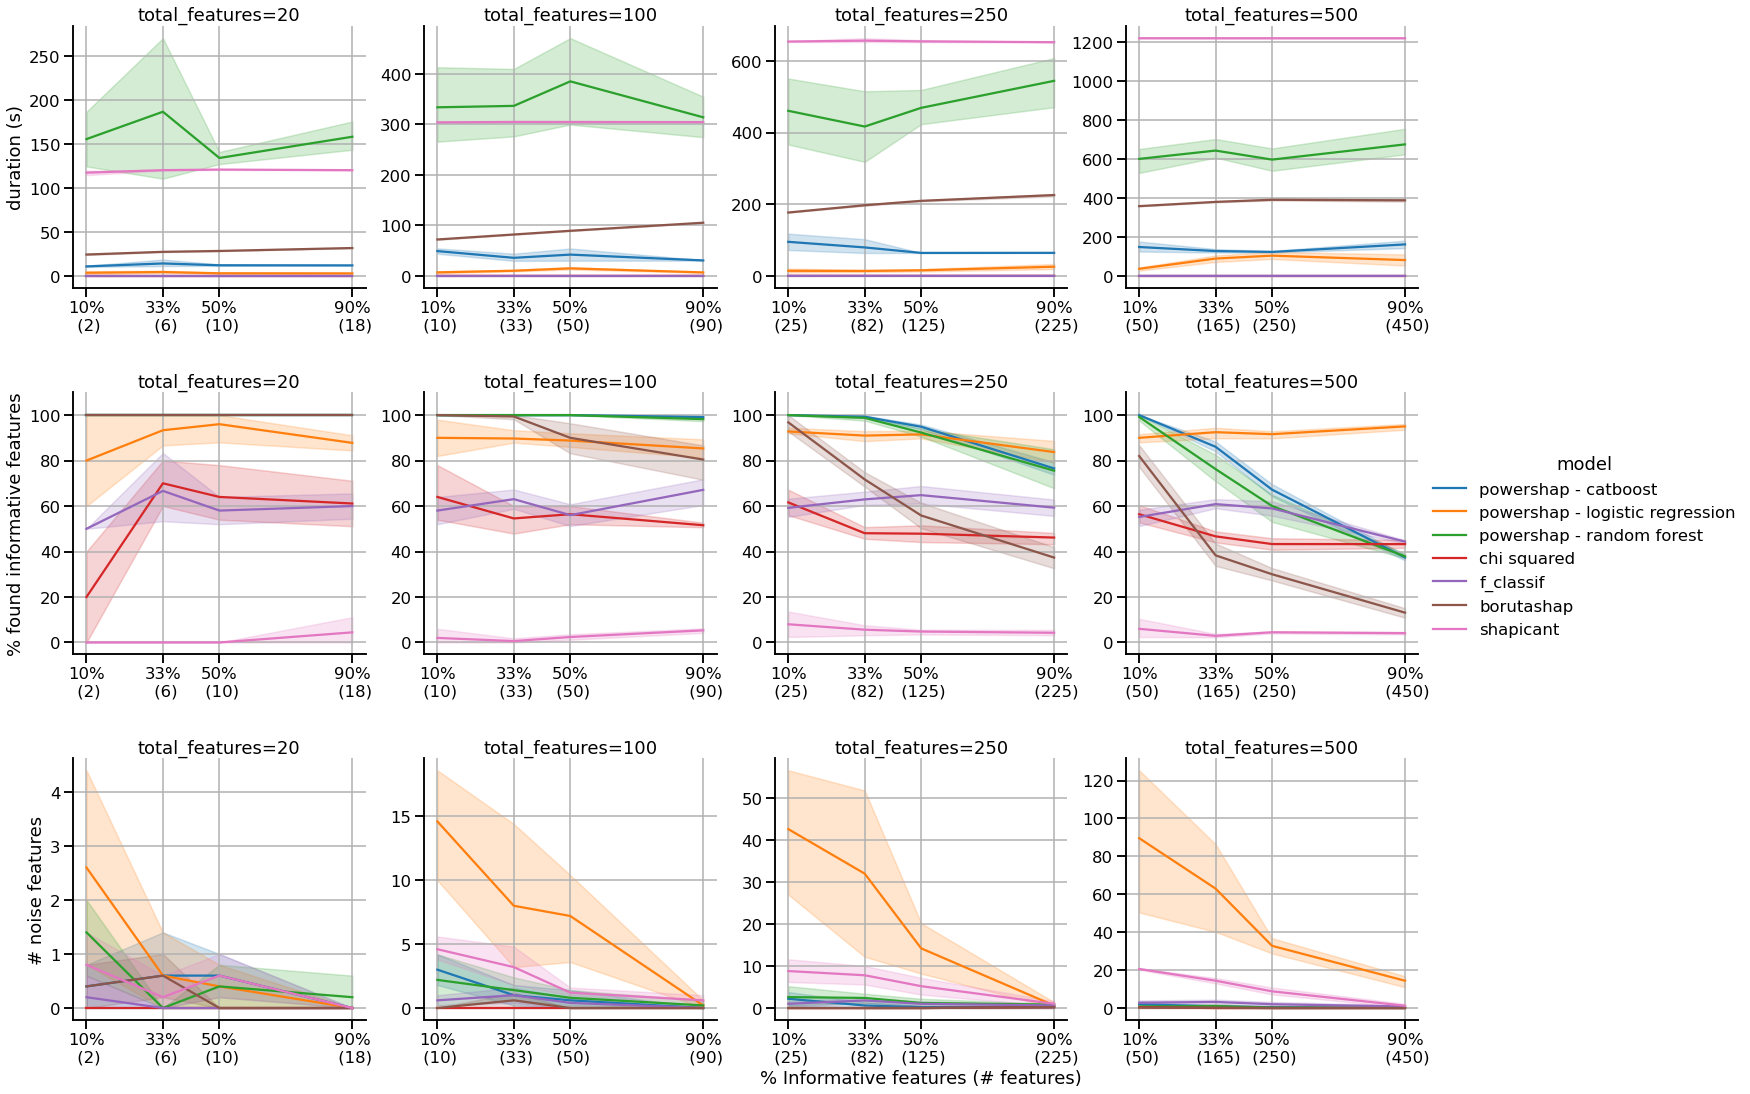

In [85]:
import seaborn as sns

df_esti_500 = pd.read_csv("results/estimators_500_Classification_output_df.csv")
df_esti_500["model"]="powershap - catboost"
df_esti_250 = pd.read_csv("results/estimators_250_Classification_output_df.csv")
df_esti_250["model"]="powershap - catboost"
df_esti_50 = pd.read_csv("results/estimators_50_Classification_output_df.csv")
df_esti_50["model"]="powershap 50 est"

df_logreg = pd.read_csv("results/logisticregressioncv_output_df.csv")
df_logreg["model"]="powershap - logistic regression"
df_logreg_polytone = pd.read_csv("results/logisticregressioncv_output_df_polytone.csv")
df_logreg_polytone["model"]="logistic regression polytone"

df_chisq = pd.read_csv("results/chisquared_output_df.csv")
df_chisq["model"]="chi squared"
df_chisq_poly = pd.read_csv("results/chi_squared_polytone_output_df.csv")
df_chisq_poly["model"]="chi polytone"

df_f_classif = pd.read_csv("results/f_classif_output_df.csv")
df_f_classif["model"]="f_classif"
df_f_classif_poly = pd.read_csv("results/f_classif_polytone_output_df.csv")
df_f_classif_poly["model"]="f_classif polytone"

df_random = pd.read_csv("results/randomforest_output_df.csv")
df_random["model"]="powershap - random forest"
t = df_random[df_random.n_samples==1000].copy()
t["n_samples"]=20000
df_random = df_random.append(t)

df_shapicant = pd.read_csv("results/shapicant_output_df.csv")
df_shapicant["model"]="shapicant"
t = df_shapicant[df_shapicant.total_features==20].copy()
t["total_features"]=50
df_shapicant = df_shapicant.append(t)
t = df_shapicant[df_shapicant.n_samples==5000].copy()
t["n_samples"]=20000
df_shapicant = df_shapicant.append(t)
t = df_shapicant[df_shapicant.n_samples==5000].copy()
t["n_samples"]=1000
df_shapicant = df_shapicant.append(t)

df_boruta = pd.read_csv("results/250_est_Catboost_borutashap_output_df.csv")
df_boruta["model"]="borutashap"

order_samples = [5000]#1000,5000,20000]
order_features = [20,100,250,500]

#df = df_esti_50.append(df_esti_250).append(df_esti_500).append(df_logreg).append(df_chisq).append(df_f_classif).append(df_random).append(df_boruta)
df = df_esti_250.append(df_logreg).append(df_random).append(df_chisq).append(df_f_classif).append(df_boruta).append(df_shapicant)
#df = df_esti_250.append(df_logreg).append(df_chisq).append(df_f_classif).append(df_boruta)

#df["model_samples"]=df["model"].values+"_"+df["n_samples"].map(lambda x: f"{x:,}").values

df["%informative_features"]=np.tile(np.repeat([10,33,50,90],5),15*7)
df["%found_informative_features"]=df["found_informative_features"]/df["informative_features"]*100
df["%outputted_noise_features"]=df["outputted_noise_features"]/(df["total_features"]-df["informative_features"])*100

df = df[df.n_samples.isin(order_samples)]
df = df[df.total_features.isin(order_features)]
df = df.drop(columns="n_samples")

sns.set_context("talk")
row_order = ["time","%found_informative_features", "outputted_noise_features"]#,"%outputted_noise_features"]
row_names = ["duration (s)","% found informative features", "# noise features"]#,"% noise features"]
#df["n_samples"] = df["n_samples"].map(lambda x: f"{x:,}")
g = sns.relplot(
    data=df.melt(
        id_vars=["total_features","informative_features","model", "%informative_features"]
    ),
    kind="line",
    hue="model",
    #hue_order=["1,000","5,000","20,000"],
    x="%informative_features",
    y="value",
    col="total_features",
    row="variable",
    palette="tab10",
    row_order=row_order,
    facet_kws={"sharey": False,"sharex":False},
    height=5,
)
g.set_titles("{col_var}={col_name}")

axis_all = g.axes

#for axs in axis_all[0]:
    #axs.set_yscale("log")
    #axs.set_ylim([1,800])
for axs in axis_all[1]:  
    axs.set_ylim([-5,110])
#for axs in axis_all[2]:
#    axs.set_ylim([-0.25,5])

j_plot=0
for row_axs, row_name in zip(g.axes, row_names):
    row_axs[0].set_ylabel(row_name)
    
    for rows in row_axs:
        rows.grid()
        rows.set_xlabel("")
        rows.set_xticks(ticks=[10,33,50,90])
        rows.set_xticklabels(append_list_strings_dict(["10%\n","33%\n","50%\n","90%\n"],df[(df.total_features==order_features[j_plot%5])&(df.seed==j_plot%5)].informative_features.values)) 
        j_plot = j_plot + 1
    j_plot = 0
    
g.axes[-1][2].set_xlabel("% Informative features (# features)")
        
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.savefig("results/total_perforamnce_all_models_"+str(order_samples[0])+".jpg", bbox_inches="tight")
plt.savefig("results/total_perforamnce_all_models_"+str(order_samples[0])+".pdf", bbox_inches="tight")
plt.savefig("results/total_perforamnce_all_models_"+str(order_samples[0])+".svg", bbox_inches="tight")
plt.savefig("results/total_perforamnce_all_models_"+str(order_samples[0])+".png", bbox_inches="tight")

#plt.savefig("total_perforamnce_all_models_"+str(order_samples[0])+".jpg", bbox_inches="tight")
#plt.savefig("total_perforamnce_all_models_"+str(order_samples[0])+".pdf", bbox_inches="tight")
#plt.savefig("total_perforamnce_all_models_"+str(order_samples[0])+".svg", bbox_inches="tight")
#plt.savefig("total_perforamnce_all_models_"+str(order_samples[0])+".png", bbox_inches="tight")

#plt.savefig("classification_50_estimators_performance_plot.pdf", bbox_inches="tight")
#plt.savefig("classification_50_estimators_performance_plot.jpg", bbox_inches="tight")
#plt.savefig("classification_50_estimators_performance_plot.pdf", bbox_inches="tight")
#plt.savefig("logisticregression_cv_performance_plot.jpg", bbox_inches="tight")

# Benchmark Results 

In [8]:
import pandas as pd
import re

class_performances = ["scene_urban","credit","gina_priori","madelon"]

end_class_df = []

for dataset in class_performances:

    df_t = pd.read_table("../../data/"+dataset+".md", sep="|", header=0, index_col=1, skipinitialspace=True) .dropna(axis=1, how='all').iloc[1:]   
    df_t = df_t.reset_index()
    df_t["dataset"]=dataset
    df_t.columns = df_t.columns.str.strip()
    
    df_t.loc[df_t["Eval set"]=="10f Cross-val ","Eval set"]='10f cross-val '

    for col in [ 'AUC', 'MCC', 'ACC','Recall', 'F1', 'Precision']:
        df_t[col+"_std"]=0
        df_t.loc[df_t[col].str.contains("\("),col+"_std"] = [pd.to_numeric(s[s.find("(")+1:s.find(")")]) for s in df_t[df_t[col].str.contains("\(")][col].values]
        df_t[col] = [pd.to_numeric(s[:s.find(" ")]) for s in df_t[col].values]
        
    if len(end_class_df) == 0:
        end_class_df = df_t.copy(deep=True)
    else:
        end_class_df = end_class_df.append(df_t)
        
end_class_df.loc[end_class_df["Eval set"]=="10f Cross-val ","Eval set"]='10f cross-val '
end_class_df.loc[end_class_df["Method"].str.contains("Automatic default powershap"),"Method"]='powershap'
end_class_df.loc[end_class_df["Method"].str.contains("Forward"),"Method"]='forward fs'
end_class_df.loc[end_class_df["Method"].str.contains("Boruto"),"Method"]='Borutashap'
end_class_df.loc[end_class_df["Method"].str.contains("All fea"),"Method"]='all features'
end_class_df.loc[end_class_df["Method"].str.contains("f_clas"),"Method"]='f_classif'
end_class_df.loc[end_class_df["Method"].str.contains("shapic"),"Method"]='shapicant'
end_class_df.loc[end_class_df["Method"].str.contains("Chi",flags=re.IGNORECASE),"Method"]='Chi²'
end_class_df = end_class_df.reset_index(drop=True)
end_class_df = end_class_df[end_class_df.dataset!="credit"]
end_class_df

,Method,# Features,Time,Eval set,AUC,MCC,ACC,Recall,F1,Precision,dataset,AUC_std,MCC_std,ACC_std,Recall_std,F1_std,Precision_std
0,powershap,73,2m39s,10f cross-val,0.942,0.646,0.904,0.904,0.897,0.900,scene_urban,0.018,0.053,0.021,0.021,0.024,0.023
1,Borutashap,14,3m40s,10f cross-val,0.902,0.573,0.848,0.848,0.858,0.880,scene_urban,0.030,0.078,0.032,0.032,0.030,0.028
2,shapicant,98,12m56,10f cross-val,0.940,0.627,0.897,0.897,0.891,0.892,scene_urban,0.019,0.062,0.025,0.025,0.027,0.027
3,forward fs,15,208m16s,10f cross-val,0.927,0.643,0.878,0.878,0.884,0.898,scene_urban,0.032,0.090,0.039,0.039,0.036,0.030
4,Chi²,93,1s,10f cross-val,0.911,0.583,0.856,0.856,0.864,0.881,scene_urban,0.030,0.078,0.037,0.037,0.034,0.026
5,f_classif,220,1s,10f cross-val,0.927,0.636,0.880,0.880,0.885,0.894,scene_urban,0.028,0.066,0.031,0.031,0.029,0.027
6,all features,294,N/A,10f cross-val,0.929,0.650,0.886,0.886,0.890,0.897,scene_urban,0.029,0.075,0.034,0.034,0.033,0.031
7,powershap,73,2m39s,test set,0.908,0.556,0.884,0.884,0.872,0.876,scene_urban,0.018,0.000,0.000,0.000,0.000,0.000
8,Borutashap,14,3m40s,test set,0.890,0.562,0.867,0.670,0.867,0.871,scene_urban,0.020,0.000,0.000,0.000,0.000,0.000
9,shapicant,98,12m56,test set,0.920,0.576,0.888,0.888,0.877,0.883,scene_urban,0.016,0.054,0.016,0.016,0.018,0.018


In [9]:
reggr_performances = ["appliances","ct_location"]

regr_end_df = []

for dataset in reggr_performances:

    df_t = pd.read_table("../../data/"+dataset+".md", sep="|", header=0, index_col=1, skipinitialspace=True) .dropna(axis=1, how='all').iloc[1:]   
    df_t = df_t.reset_index()
    df_t["dataset"]=dataset
    df_t.columns = df_t.columns.str.strip()
    df_t.loc[df_t["Eval set"]=="10f Cross-val ","Eval set"]='10f cross-val '

    for col in ['R²','RMSE','MAE','ME']:
        df_t[col+"_std"]=0
        df_t.loc[df_t[col].str.contains("\("),col+"_std"] = [pd.to_numeric(s[s.find("(")+1:s.find(")")]) for s in df_t[df_t[col].str.contains("\(")][col].values]
        df_t[col] = [pd.to_numeric(s[:s.find(" ")]) for s in df_t[col].values]
        
    if len(regr_end_df) == 0:
        regr_end_df = df_t.copy(deep=True)
    else:
        regr_end_df = regr_end_df.append(df_t)

regr_end_df.loc[regr_end_df["Method"].str.contains("Automatic default powershap"),"Method"]='powershap'
regr_end_df.loc[regr_end_df["Method"].str.contains("Forward"),"Method"]='forward fs'
regr_end_df.loc[regr_end_df["Method"].str.contains("Boruto"),"Method"]='Borutashap'
regr_end_df.loc[regr_end_df["Method"].str.contains("All fea"),"Method"]='all features'
regr_end_df.loc[regr_end_df["Method"].str.contains("shapic"),"Method"]='shapicant'
regr_end_df.loc[regr_end_df["Method"].str.contains("f_regr"),"Method"]='f_regression'
regr_end_df = regr_end_df.reset_index(drop=True)
regr_end_df

,Method,# Features,Time,Eval set,R²,RMSE,MAE,ME,dataset,R²_std,RMSE_std,MAE_std,ME_std
0,powershap,24,34s,10f cross-val,0.426,76.972,39.372,-0.527,appliances,0.027,4.017,1.704,2.012
1,Borutashap,24,48s,10f cross-val,0.427,76.942,39.503,-0.387,appliances,0.028,4.118,1.833,2.189
2,shapicant,10,2m14s,10f cross-val,0.375,86.715,46.513,-0.246,appliances,0.019,4.638,1.991,2.475
3,forward fs,13,31m53s,10f cross-val,0.414,77.794,40.446,-0.331,appliances,0.022,4.254,1.799,2.150
4,f_regression,20,1s,10f cross-val,0.421,77.335,39.732,-0.279,appliances,0.029,4.333,1.974,2.166
5,all features,27,N/A,10f cross-val,0.415,77.758,39.973,-0.365,appliances,0.028,4.393,1.988,2.075
6,powershap,24,34s,test set,0.427,78.980,40.257,-3.031,appliances,0.021,0.000,0.000,0.000
7,Borutashap,24,48s,test set,0.417,79.833,41.109,-2.605,appliances,0.020,0.000,0.000,0.000
8,shapicant,10,2m14s,test set,0.388,88.237,47.441,-3.078,appliances,0.020,3.000,1.246,1.533
9,forward fs,13,31m53s,test set,0.416,79.929,41.932,-2.215,appliances,0.020,0.000,0.000,0.000


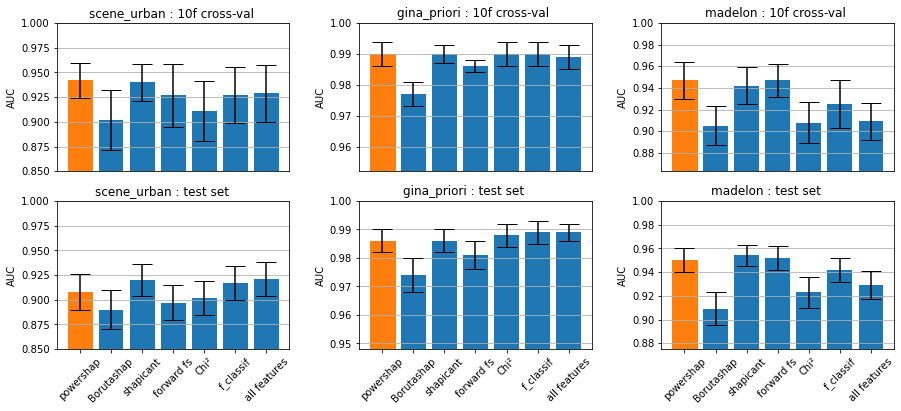

In [10]:
metric = "AUC"

i = 0
f, axs = plt.subplots(2,3,figsize=(15,6))
for evalset in end_class_df["Eval set"].unique():
    j = 0
    for dataset in end_class_df.dataset.unique():
        current_df = end_class_df[(end_class_df.dataset==dataset)&(end_class_df["Eval set"]==evalset)]
        barplot_object = axs[i][j].bar(current_df.Method.values,current_df[metric].values, yerr = current_df[metric+"_std"].values,capsize=10,color="#1f77b4")
        barplot_object[0].set_color("#ff7f0e")
        axs[i][j].set_ylabel(metric)
        if i != 1:
            axs[i][j].get_xaxis().set_visible(False)#.tick_params(axis='x',labelbottom='false',which='both')
        else:
            axs[i][j].tick_params(axis='x', rotation=45)
        axs[i][j].set_ylim([np.min(current_df[metric].values)-np.max([0.025,np.max(current_df[metric+"_std"].values)+0.02]),np.min([1.000,np.max(current_df[metric].values)+np.max(current_df[metric+"_std"].values)+0.1])])
        axs[i][j].set_title(dataset + " : "+evalset)
        axs[i][j].yaxis.grid(True)
        j = j+1

    i = i + 1
    
plt.subplots_adjust(wspace=0.3, hspace=0.2)

plt.savefig("results/benchmark_performance_all_methods_class.jpg", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_class.pdf", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_class.svg", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_class.png", bbox_inches="tight")

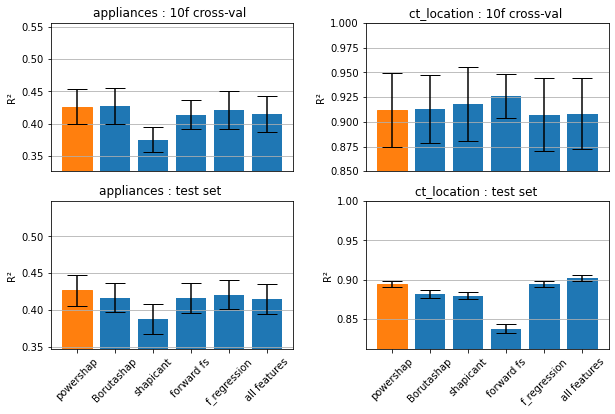

In [11]:
metric = "R²"

i = 0
f, axs = plt.subplots(2,2,figsize=(10,6))
for evalset in regr_end_df["Eval set"].unique():
    j = 0
    for dataset in regr_end_df.dataset.unique():
        current_df = regr_end_df[(regr_end_df.dataset==dataset)&(regr_end_df["Eval set"]==evalset)]

        barplot_object = axs[i][j].bar(current_df.Method.values,current_df[metric].values, yerr = current_df[metric+"_std"].values,capsize=10,color="#1f77b4")
        barplot_object[0].set_color("#ff7f0e")
        axs[i][j].set_ylabel(metric)
        if i != 1:
            axs[i][j].get_xaxis().set_visible(False)#.tick_params(axis='x',labelbottom='false',which='both')
        else:
            axs[i][j].tick_params(axis='x', rotation=45)
        axs[i][j].set_ylim([np.min(current_df[metric].values)-np.max([0.025,np.max(current_df[metric+"_std"].values)+0.02]),np.min([1.000,np.max(current_df[metric].values)+np.max(current_df[metric+"_std"].values)+0.1])])
        axs[i][j].set_title(dataset + " : "+evalset)
        axs[i][j].yaxis.grid(True)
        j = j+1

    #f.show()
    i = i + 1
    
plt.subplots_adjust(wspace=0.3, hspace=0.2)

plt.savefig("results/benchmark_performance_all_methods_regres.jpg", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_regres.pdf", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_regres.svg", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_regres.png", bbox_inches="tight")